In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from isaac.constants import FORCE_CLASS_COLS, MASS_CLASS_COLS, BASIC_TRAINING_COLS, PUCK_SQUARE_DISTANCES, PUCK_ANGLE_FEATURES
from isaac.evaluation import evaluate_saved_model
from isaac.visualization import plot_lineplot_with_paper_style

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
question_type = "mass"
directory = "yoked_from_scratch_plots/"
stats = pd.read_hdf(directory+"stats.h5")

In [3]:
stats.head()

,Epoch,Mass Loss,Force Loss,Mass Train Accuracy,Mass Val Accuracy,Force Train Accuracy,Force Val Accuracy,seed
0,0,1.109858,1.108289,34.514436,35.433071,34.776903,34.645669,0
1,1,1.096944,1.097365,38.976378,40.944882,38.845144,46.456693,0
2,2,1.088782,1.089342,39.763780,39.370079,41.994751,45.669291,0
3,3,1.088208,1.076161,40.551181,37.795276,45.406824,39.370079,0
4,4,1.076231,1.068261,40.944882,38.582677,47.637795,39.370079,0


/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


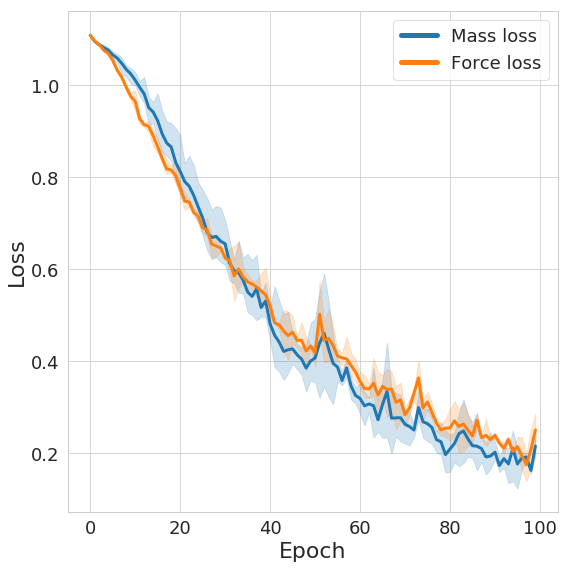

In [5]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Loss", markers=True, data=stats, linewidth=3, label="Mass loss")
ax = plot_lineplot_with_paper_style(None, ax=ax, x="Epoch", y="Force Loss", markers=True, data=stats, linewidth=3, label="Force loss")
plt.ylabel("Loss")
plt.savefig(directory+"losses.pdf")

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


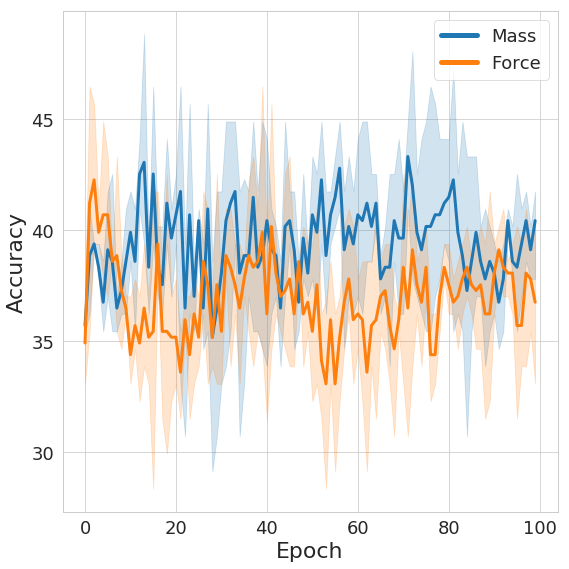

In [6]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Val Accuracy", data=stats, label="Mass")
ax = plot_lineplot_with_paper_style(None, ax=ax, x="Epoch", y="Force Val Accuracy", data=stats, label="Force")
plt.ylabel("Accuracy")
plt.savefig(directory+"accuracies.pdf")